In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import os
from sklearn.model_selection import GridSearchCV
from imutils import paths
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [19]:
def imgm(img,size=(32,32)):
    img=cv2.resize(img,size)
    pix=img.flatten()
    return pix

In [20]:
path=list(paths.list_images("/content/drive/MyDrive/Colab Notebooks/DataSets"))
IMG=[]
label=[]

for (i, image_path) in enumerate(path):
    image = cv2.imread(image_path)
    lab = image_path.split(os.path.sep)[-2].split(".")[0]
    # extract raw pixel intensity "features
    pixels = imgm(image)
    IMG.append(pixels)
    label.append(lab)

x = np.array(IMG)
y = np.array(label)


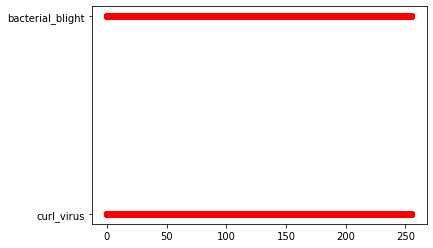

In [49]:
_=plt.plot(x,y,"ro")

In [50]:
figure = imgs.get_figure()    
figure.savefig('input data svm.png', dpi=400)

In [21]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
sv=SVC(probability=True)
model=GridSearchCV(sv,param_grid)

In [22]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
model.fit(xtrain,ytrain)


GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1],
                         'kernel': ['rbf', 'poly']})

In [23]:
pred=model.predict(xtest)


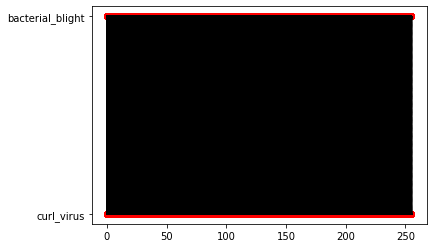

In [51]:
_=plt.plot(xtest,ytest,"ro",xtest,pred,"--k")

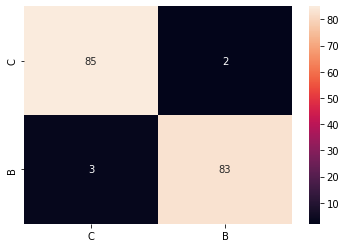

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as ss
con=confusion_matrix(ytest,pred)
imgs=ss.heatmap(con,annot=True,yticklabels="CB",xticklabels="CB")


In [45]:
figure = imgs.get_figure()    
figure.savefig('confusion svm.png', dpi=400)

In [47]:
from sklearn.metrics import classification_report
report=classification_report(ytest,pred)
print(report)

                  precision    recall  f1-score   support

bacterial_blight       0.97      0.98      0.97        87
      curl_virus       0.98      0.97      0.97        86

        accuracy                           0.97       173
       macro avg       0.97      0.97      0.97       173
    weighted avg       0.97      0.97      0.97       173

